In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
%matplotlib inline 

In [2]:
df = pd.read_csv('input/My Uber Drives - 2016.csv')
print(df.tail())
df.info()

           START_DATE*         END_DATE* CATEGORY*            START*  \
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                 STOP*   MILES*        PURPOSE*  
1151  Unknown Location      3.9  Temporary Site  
1152  Unknown Location     16.2         Meeting  
1153           Gampaha      6.4  Temporary Site  
1154         Ilukwatta     48.2  Temporary Site  
1155               NaN  12204.7             NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          11

In [3]:
df1 = df.drop(df.index[1155])
df1.info()
df1['PICK_DATE'] = df['START_DATE*'].str.split(' ').str[0]
df1['DROP_DATE'] = df['END_DATE*'].str.split(' ').str[0]
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 72.2+ KB
      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE* PICK_DATE DROP_DATE  
0     5.1   Meal/Entertain  1/1/2016  1/1/2016  
1     5.0              NaN  

In [4]:
test = [df1]

for dataset in test: 
    dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*']).astype('datetime64[ns]')
    dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*']).astype('datetime64[ns]')

In [5]:
df1['CITY_PAIR'] = df1['START*']+'-'+ df1['STOP*']

In [6]:
df1['TOTAL_TIME'] = df1['END_DATE*']-df1['START_DATE*']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 11 columns):
START_DATE*    1155 non-null datetime64[ns]
END_DATE*      1155 non-null datetime64[ns]
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       653 non-null object
PICK_DATE      1155 non-null object
DROP_DATE      1155 non-null object
CITY_PAIR      1155 non-null object
TOTAL_TIME     1155 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(7), timedelta64[ns](1)
memory usage: 148.3+ KB


In [7]:
df1.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
PICK_DATE        0
DROP_DATE        0
CITY_PAIR        0
TOTAL_TIME       0
dtype: int64

In [8]:
df1['PURPOSE*'] = df1['PURPOSE*'].fillna('Other')

In [9]:
df1.groupby('PURPOSE*', as_index=False).sum()

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Other,4893.5


In [10]:
df1.isnull().sum()


START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
PICK_DATE      0
DROP_DATE      0
CITY_PAIR      0
TOTAL_TIME     0
dtype: int64

In [11]:
data = [df1]

for dataset in data:
    dataset['CATEGORY*'][df1['PURPOSE*']=='Meeting'] = 'Meeting'

In [12]:
df1.describe()

,MILES*,TOTAL_TIME
count,1155.000000,1155
mean,10.566840,0 days 00:23:14.597402
std,21.579106,0 days 00:27:19.096606
min,0.500000,0 days 00:00:00
25%,2.900000,0 days 00:10:00
50%,6.000000,0 days 00:16:00
75%,10.400000,0 days 00:27:30
max,310.300000,0 days 05:36:00


In [13]:
df1.describe(include=['O'])

,CATEGORY*,START*,STOP*,PURPOSE*,PICK_DATE,DROP_DATE,CITY_PAIR
count,1155,1155,1155,1155,1155,1155,1155
unique,3,177,188,11,294,294,363
top,Business,Cary,Cary,Other,12/29/2016,12/29/2016,Unknown Location-Unknown Location
freq,891,201,203,502,13,13,86


In [14]:
df1.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,PICK_DATE,DROP_DATE,CITY_PAIR,TOTAL_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,1/1/2016,Fort Pierce-Fort Pierce,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1/2/2016,1/2/2016,Fort Pierce-Fort Pierce,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,1/2/2016,Fort Pierce-Fort Pierce,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Meeting,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,1/5/2016,Fort Pierce-Fort Pierce,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,1/6/2016,Fort Pierce-West Palm Beach,01:07:00


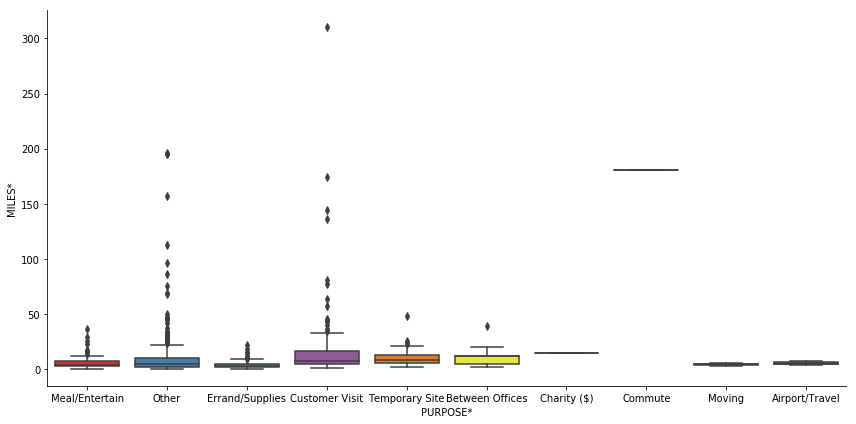

In [15]:
oth = ['Meeting']

g = sns.FacetGrid(data=df1[~df1['PURPOSE*'].isin(oth)], aspect=2, size=6)
g.map(sns.boxplot, 'PURPOSE*', 'MILES*', palette="Set1")
plt.show()
#Data Visualization
#The below boxplot shows by purpose and miles driven. 
#As you can see from the boxplot the outliers in this case there are several. 
#The one that catches my attention is the customer visit with a total miles driven of 300 miles. 
#This represet a trip picked up from city Latta to city Jacksonville with aproximate travel time of 5 hours and 30 minutes.

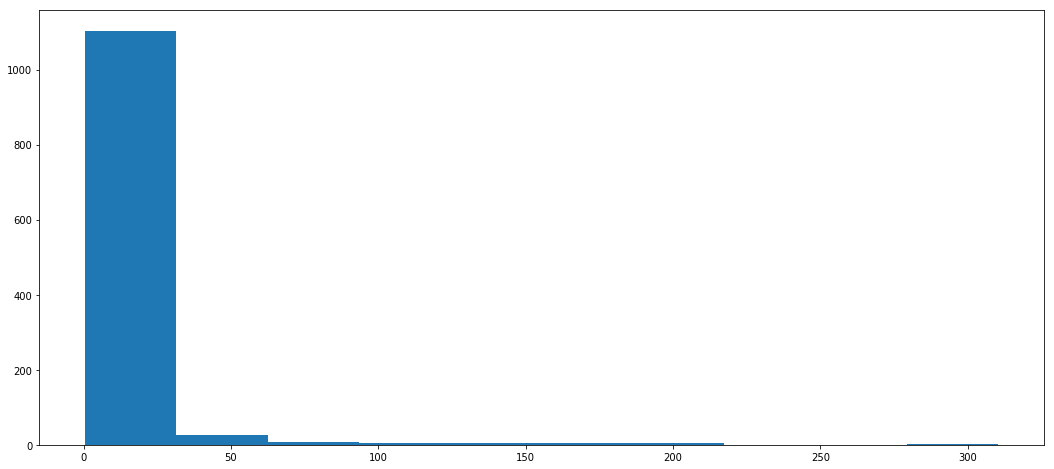

In [16]:
plt.figure(figsize=(18,8))
plt.hist(df1['MILES*'])
plt.show()
#The below Distriubtion plot shows the miles disributed by trips. It shows that between 0-25 there are a total of 1100 trips.

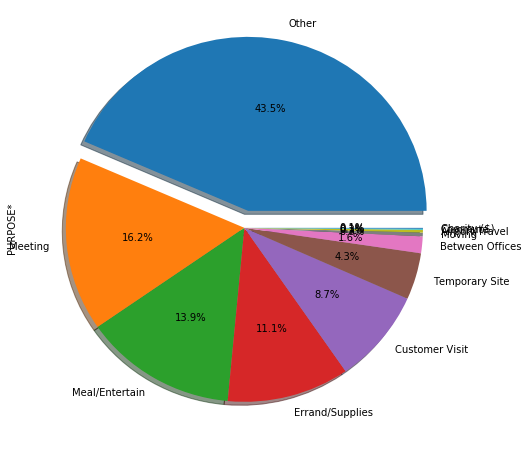

In [17]:
plt.figure(figsize=(8,8))
df1['PURPOSE*'].value_counts()[:11].plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0,0])
plt.show()

#This pie chart represents the percentage of trips made using the PURPOSE* variables. 
#I have exploded the piece of the pie chart with the highest percentage. 
#In this case are those trips that did not have a value assigned. 
#Hence earlier I used a fillna() function to this missing values and replace those values with NA.

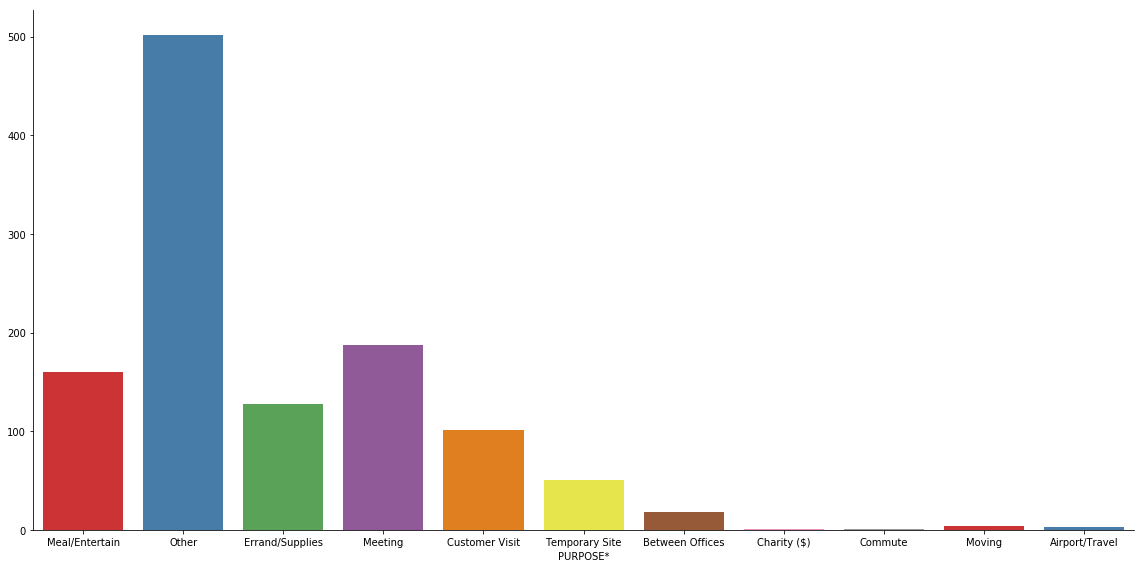

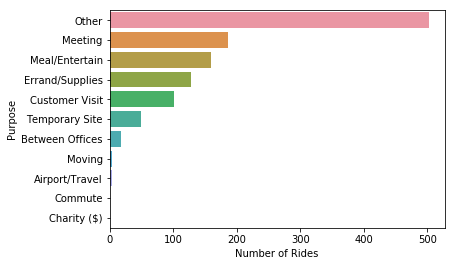

In [18]:
g = sns.FacetGrid(data=df1, aspect=2, size=8)
g.map(sns.countplot, 'PURPOSE*', palette="Set1")
plt.show()
#creating a dataframe containing type of purpose and the number of rides associated with each purpose
ride_count = df1['PURPOSE*'].value_counts().tolist()
ride_purpose= df1['PURPOSE*'].value_counts().index.tolist()
ride_info = list(zip(ride_purpose,ride_count))
ride_info = pd.DataFrame(ride_info,columns=['PURPOSE','COUNT'])

ax = sns.barplot(x='COUNT',y='PURPOSE',data=ride_info,order=ride_info['PURPOSE'].tolist(),)
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.show()

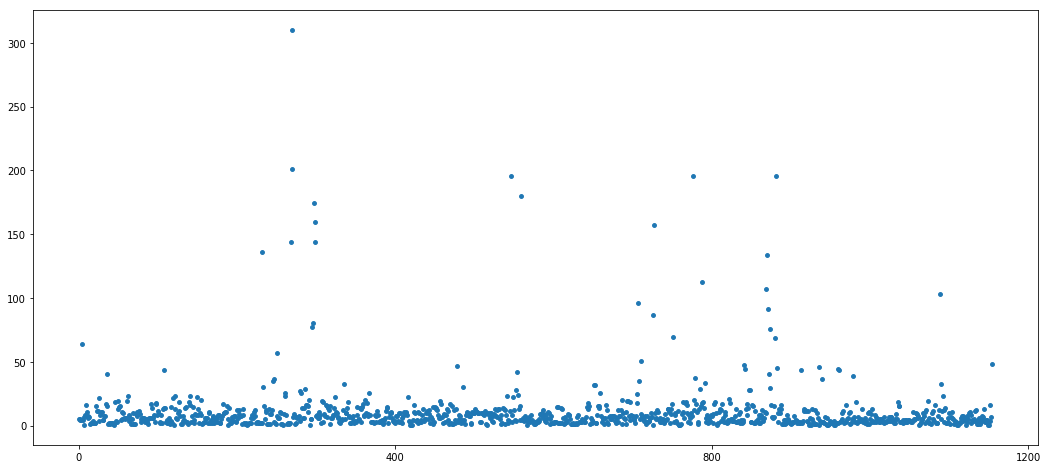

In [19]:
x = np.arange(0, 1155)
y = df1['MILES*']

plt.figure(figsize=(18,8))

plt.scatter(x, y, s=15)
plt.xticks([0, 400, 800, 1200])
plt.show()

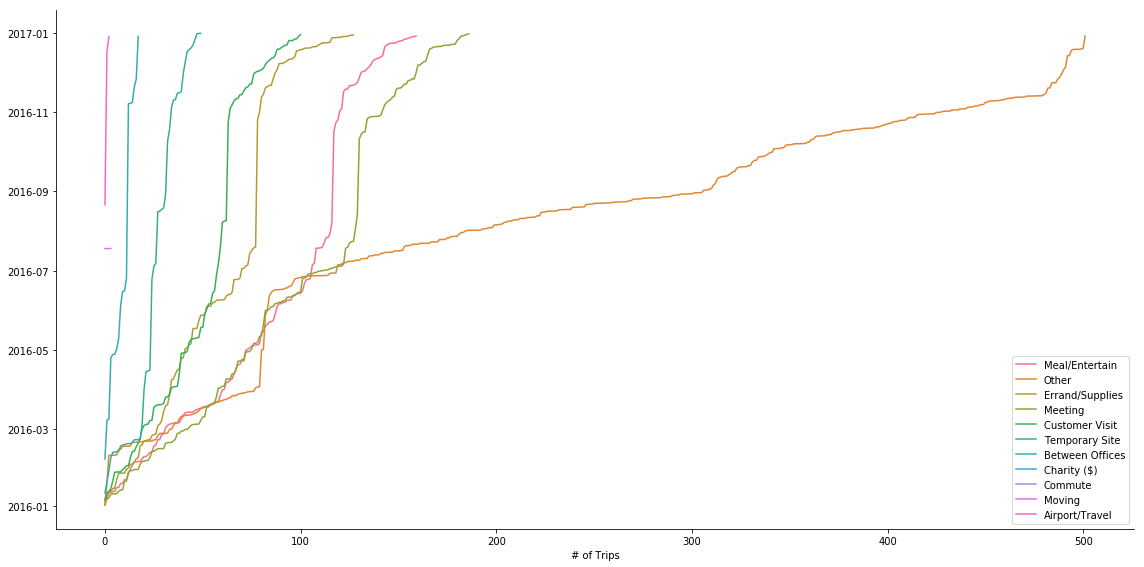

In [20]:
g = sns.FacetGrid(data=df1, aspect=2, size=8, hue='PURPOSE*')
g.map(plt.plot, 'START_DATE*')
plt.legend()
plt.xlabel('# of Trips')
plt.show()

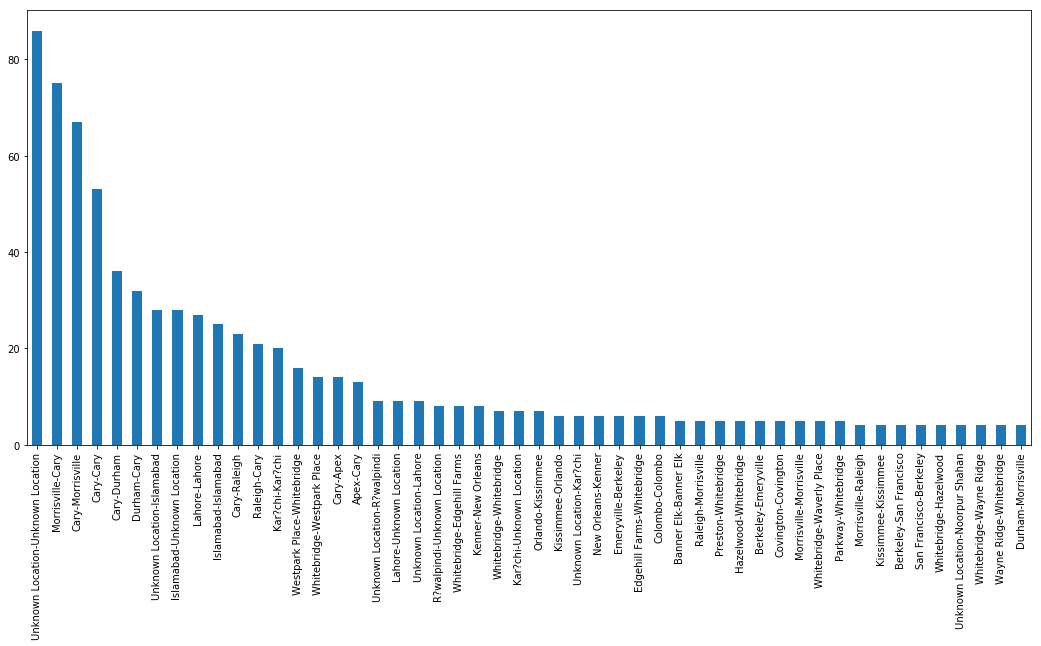

In [21]:
plt.figure(figsize=(18,8))
df1['CITY_PAIR'].value_counts()[:50].plot(kind='bar')
plt.show()

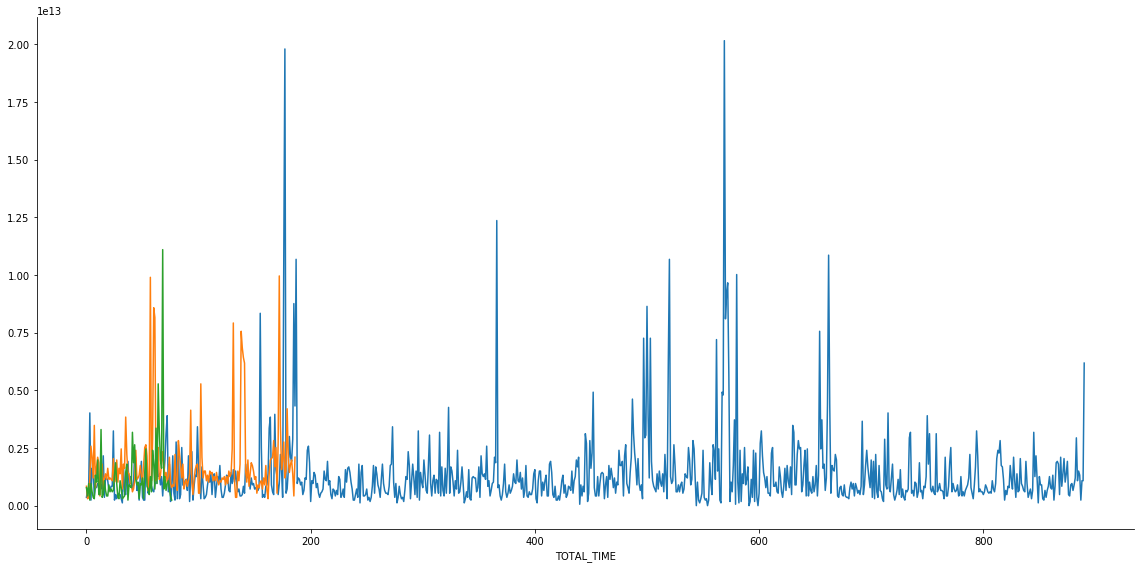

In [22]:
g = sns.FacetGrid(data=df1, aspect=2, size=8, hue='CATEGORY*')
g.map(plt.plot, 'TOTAL_TIME')
plt.show()

In [26]:
totals = df1.groupby('CATEGORY*', as_index=False).agg({'MILES*': 'sum'})
df1['CATEGORY*']

0       Business
1       Business
2       Business
3        Meeting
4       Business
5       Business
6        Meeting
7        Meeting
8        Meeting
9       Business
10       Meeting
11       Meeting
12       Meeting
13      Business
14      Business
15      Business
16      Business
17      Business
18      Business
19      Business
20      Business
21      Business
22       Meeting
23       Meeting
24       Meeting
25      Business
26      Business
27      Business
28      Business
29      Business
          ...   
1125    Business
1126    Business
1127    Business
1128    Business
1129    Business
1130    Business
1131    Business
1132    Business
1133    Business
1134    Business
1135    Business
1136    Business
1137    Business
1138    Business
1139    Business
1140    Business
1141    Business
1142     Meeting
1143    Business
1144     Meeting
1145    Business
1146    Business
1147    Business
1148     Meeting
1149    Business
1150     Meeting
1151    Business
1152     Meeti

In [27]:
totals['PERCENTAGE'] = (totals['MILES*']/df1['MILES*'].sum())*100
totals

,CATEGORY*,MILES*,PERCENTAGE
0,Business,8635.7,70.757167
1,Meeting,2851.3,23.362311
2,Personal,717.7,5.880521


In [28]:
ride_summary = df1.groupby('PURPOSE*').mean()
ride_summary

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


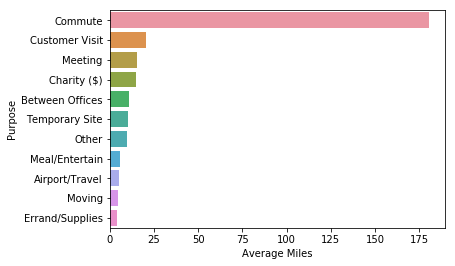

In [29]:
ride_summary['PURPOSE*']=ride_summary.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=ride_summary,
                 order=ride_summary.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Average Miles', ylabel='Purpose')
plt.show()

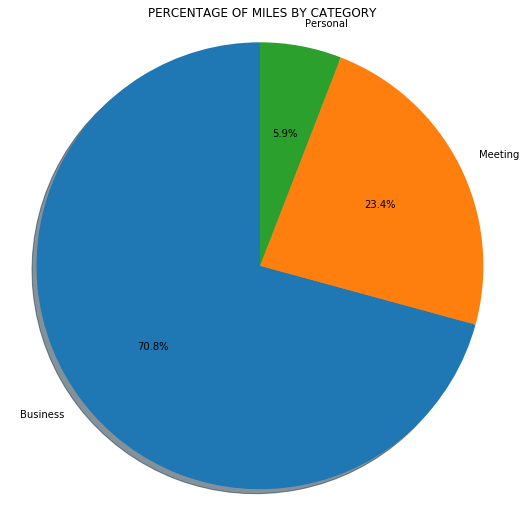

In [30]:
sizes = np.array(totals['PERCENTAGE'])
labels = np.array(totals['CATEGORY*'])


fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('PERCENTAGE OF MILES BY CATEGORY')

plt.show()


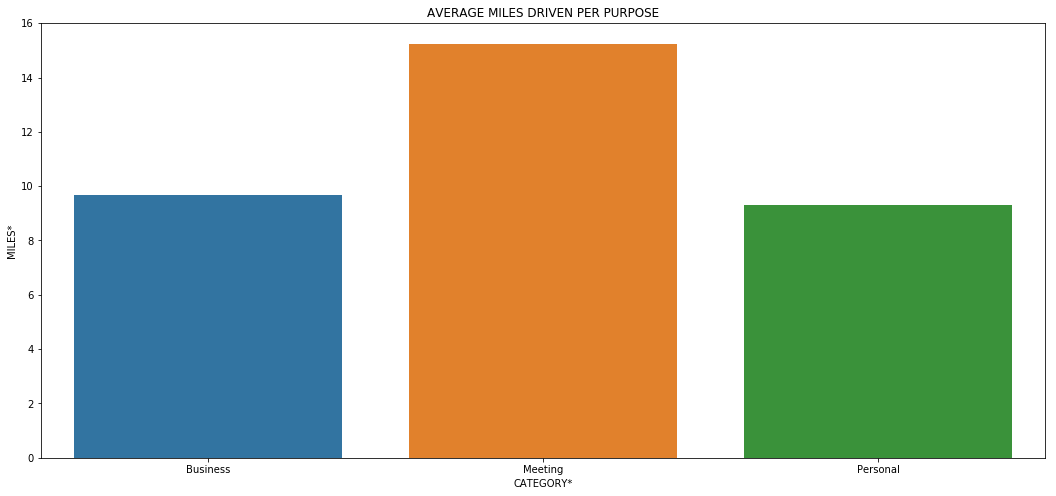

In [31]:
cat = df1.groupby('CATEGORY*', as_index=False).mean()

plt.figure(figsize=(18,8))

sns.barplot('CATEGORY*', 'MILES*', data=cat)
plt.title('AVERAGE MILES DRIVEN PER PURPOSE')
plt.show()

In [32]:
df1['PURPOSE*'].value_counts()

Other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

In [33]:
rides=df1.groupby('PICK_DATE').sum()
rides

,MILES*
PICK_DATE,
1/1/2016,5.1
1/10/2016,49.3
1/11/2016,11.6
1/12/2016,27.2
1/13/2016,23.0
1/14/2016,25.8
1/15/2016,28.8
1/18/2016,9.5
1/19/2016,14.8


In [34]:
rides_per_month = rides.groupby('PICK_DATE').sum()
rides_per_month['Month']=pd.to_datetime(rides_per_month.index.tolist()) #converting dates to a python friendly format
rides_per_month['Month']= rides_per_month['Month'].dt.to_period("M") #grouping dates by month
rides_per_month= rides_per_month.sort_values(by= 'Month',ascending=True)

In [35]:
total_miles_per_month= rides_per_month.groupby('Month').sum()

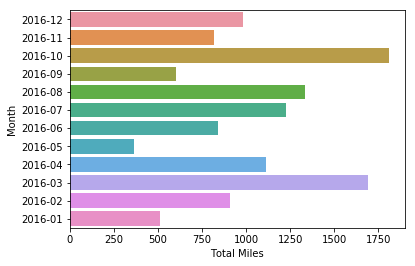

In [36]:
total_miles_per_month['MONTH']=total_miles_per_month.index.tolist()
total_miles_per_month['MONTH']=total_miles_per_month['MONTH'].astype(str) #converting the time stamp format to string
ax = sns.barplot(x='MILES*',y='MONTH',data=total_miles_per_month,order=total_miles_per_month.sort_values
                 ('MONTH',ascending=False)['MONTH'].tolist())
ax.set(xlabel='Total Miles', ylabel='Month')
plt.show()

In [37]:
g = nx.Graph()

In [38]:
df1.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,PICK_DATE,DROP_DATE,CITY_PAIR,TOTAL_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,1/1/2016,Fort Pierce-Fort Pierce,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1/2/2016,1/2/2016,Fort Pierce-Fort Pierce,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,1/2/2016,Fort Pierce-Fort Pierce,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Meeting,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,1/5/2016,Fort Pierce-Fort Pierce,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,1/6/2016,Fort Pierce-West Palm Beach,01:07:00


In [39]:
g= nx.from_pandas_dataframe(df1,source='START*',target='STOP*',
                            edge_attr=['PICK_DATE','DROP_DATE','CATEGORY*','MILES*','PURPOSE*'])

In [40]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 280
Average degree:   2.6794


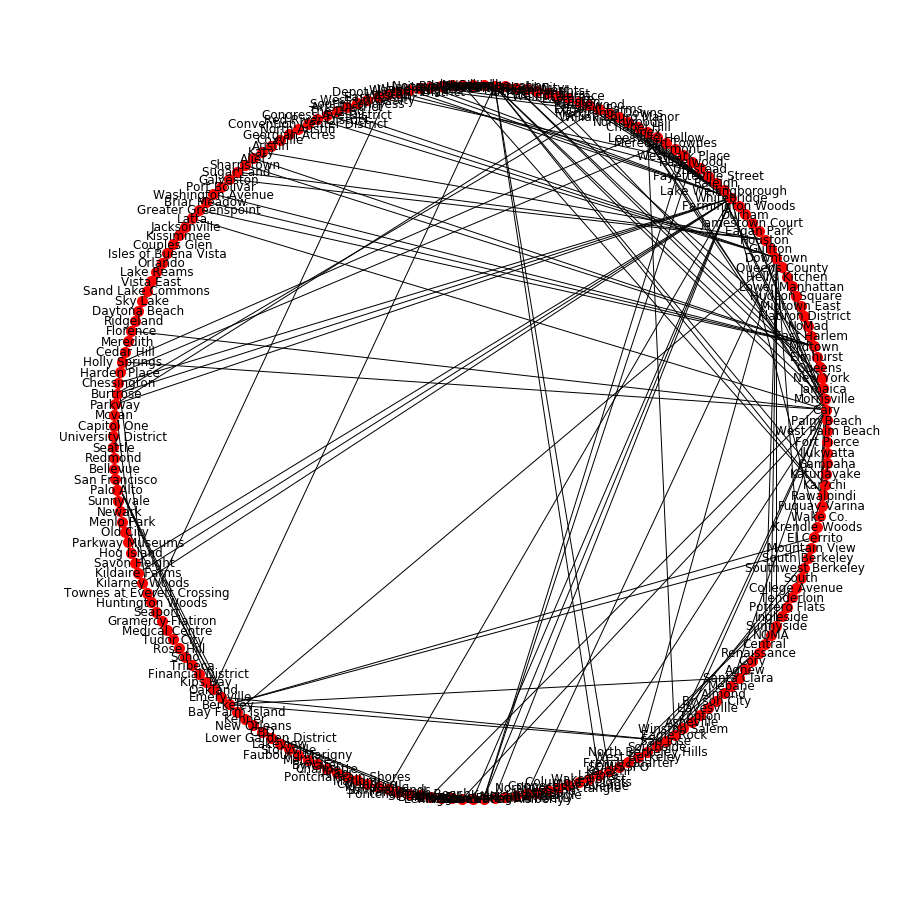

In [41]:
plt.figure(figsize=(12,12)) 
nx.draw_circular(g,with_labels=True,node_size=100)
plt.show()

In [42]:
#identifying which location is being visited more frequently (whether for pickup or dropoff)
location=[]
degree=[]
for node in g:
    location.append(node)
    degree.append(g.degree(node))
    
degree_dist_list = list (zip(location,degree))
# degree_dist = pd.DataFrame.sort(columns='Degree',ascending=False)
degree_dist = pd.DataFrame(degree_dist_list, columns=['Location','Degree'])
print(degree_dist)


                Location  Degree
0            Fort Pierce       3
1        West Palm Beach       4
2             Palm Beach       1
3                   Cary      18
4            Morrisville       9
5                Jamaica       2
6               New York       6
7                 Queens       1
8               Elmhurst       1
9                Midtown      14
10           East Harlem       2
11                 NoMad       1
12     Flatiron District       1
13          Midtown East       1
14         Hudson Square       3
15       Lower Manhattan       1
16        Hell's Kitchen       2
17         Queens County       1
18              Downtown      12
19               Gulfton       1
20               Houston       5
21            Eagan Park       1
22       Jamestown Court       3
23                Durham       3
24      Farmington Woods       2
25           Whitebridge      26
26   Lake Wellingborough       1
27               Raleigh       4
28   Fayetteville Street       3
29        

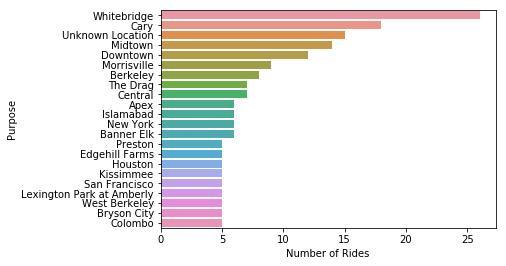

In [43]:
#plotting locations that were visited at least 5 times.
ax = sns.barplot(x='Degree',y='Location',data=degree_dist[degree_dist['Degree']>=5],
                 order=degree_dist[degree_dist['Degree']>=5].sort_values('Degree',ascending=False)['Location'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.figure(figsize=(60,60))
plt.show()

In [44]:
#since the highest number of rides were for meeting purposes, here I visualize this network of rides
g2= nx.Graph()
g2 = nx.from_pandas_dataframe(df1[df1['PURPOSE*']=='Meeting'],source='START*',target='STOP*')

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 71
Average degree:   1.7108


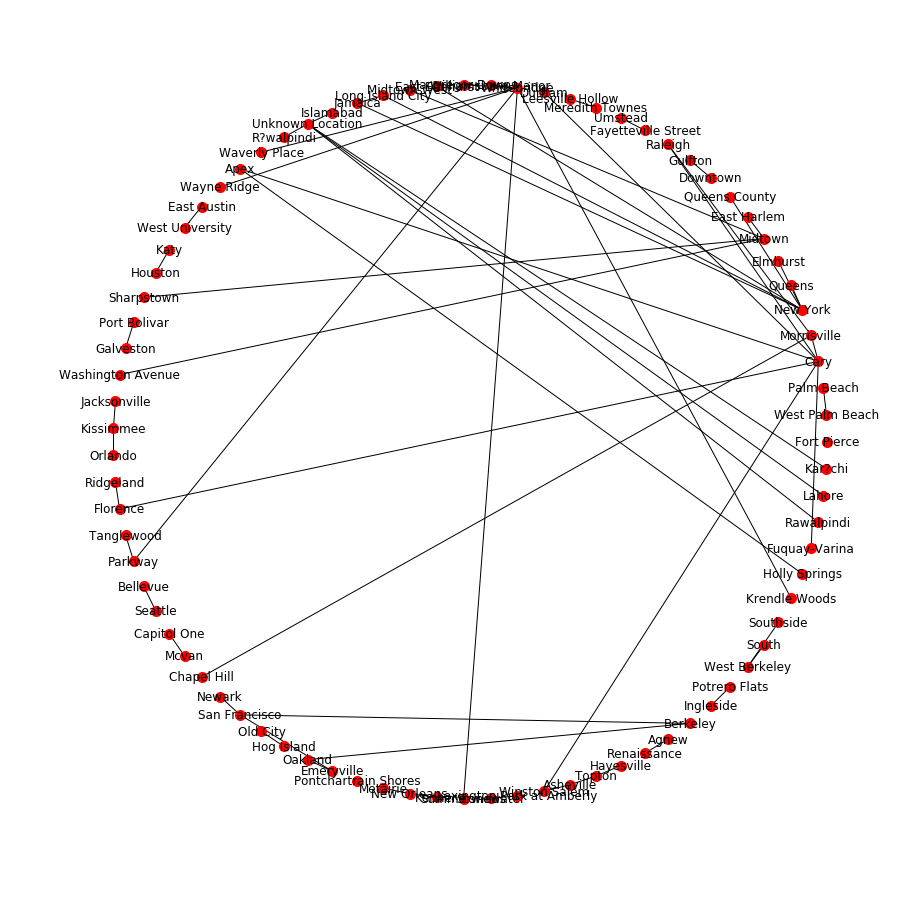

In [45]:
print (nx.info(g2))
plt.figure(figsize=(12,12)) 
nx.draw_shell(g2,with_labels=True,node_size=100)
plt.show()

                     Location  Degree
0                 Fort Pierce       3
1             West Palm Beach       4
2                  Palm Beach       1
3                        Cary      18
4                 Morrisville       9
5                    New York       6
6                      Queens       1
7                    Elmhurst       1
8                     Midtown      14
9                 East Harlem       2
10              Queens County       1
11                   Downtown      12
12                    Gulfton       1
13                    Raleigh       4
14        Fayetteville Street       3
15                    Umstead       1
16            Meredith Townes       4
17           Leesville Hollow       1
18                     Durham       3
19                Whitebridge      26
20         Williamsburg Manor       1
21            Macgregor Downs       2
22              East Elmhurst       2
23               Midtown West       1
24           Long Island City       2
25          

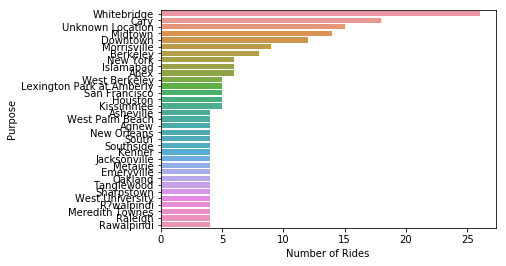

In [46]:
location_2=[]
degree_2=[]
for node in g2:
    location_2.append(node)
    degree_2.append(g.degree(node))

degree_dist_list_2 = list (zip(location_2,degree_2))
degree_dist_2 = pd.DataFrame(degree_dist_list_2, columns=['Location','Degree'])
print(degree_dist_2)
#plotting locations that were visited at least 4 times.
ax = sns.barplot(x='Degree',y='Location',data=degree_dist_2[degree_dist_2['Degree']>=4],
                 order=degree_dist_2[degree_dist_2['Degree']>=4].sort_values('Degree',ascending=False)['Location'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.figure(figsize=(60,60))
plt.show()
